# Data exploration

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import torch

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from scp.models import PROTVI
import scp.plots as pl
import scp.utils as utils
import scp.benchmark_models as bm

import scvi

np.random.seed(0)
scvi.settings.seed = 0

Global seed set to 0


## 1. Data loading

In [2]:
adata = sc.read_h5ad("../../data/processed/poulos2020.h5ad")

## 2. Data Exploration

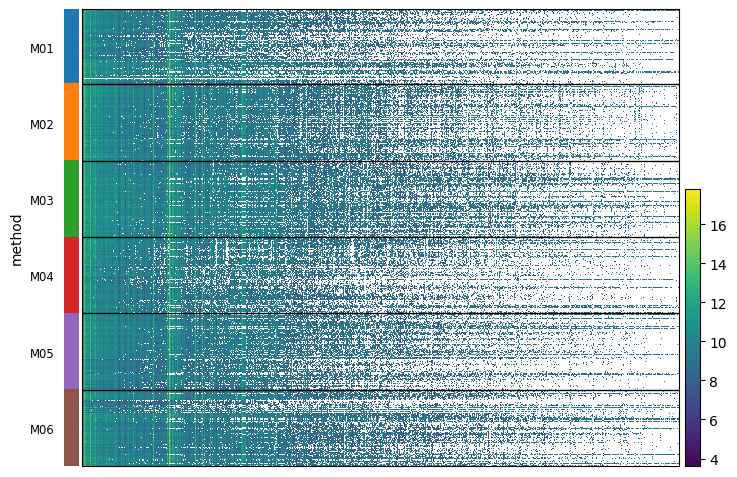

In [3]:
adata = utils.sort_anndata_by_missingness(adata)

sc.pl.heatmap(adata, var_names=adata.var_names, groupby="method", show_gene_labels=False)

In [4]:
protein_missingness = utils.get_missingness_per_protein(adata, layer="raw")
print(f"Proteins with no missing values: {np.sum(protein_missingness == 0) / len(protein_missingness) * 100:.2f}%")

Proteins with no missing values: 0.00%


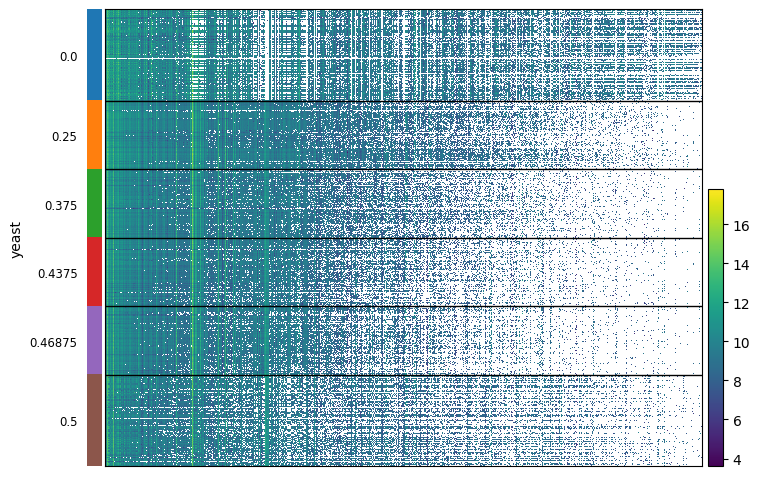

In [5]:
sc.pl.heatmap(adata, var_names=adata.var_names, groupby="yeast", show_gene_labels=False)

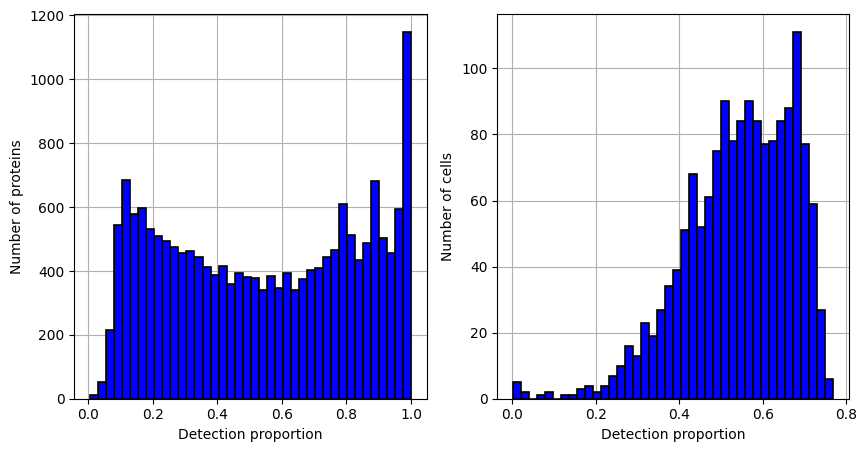

In [6]:
mask = np.isnan(adata.X)

p_protein = (~mask).mean(axis=0)
p_cell = (~mask).mean(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

ax = axes[0]
ax.hist(p_protein, bins=40, edgecolor="black", linewidth=1.2, color="blue")
ax.set_xlabel("Detection proportion")
ax.set_ylabel("Number of proteins")
ax.grid(True)
ax.set_axisbelow(True)

ax = axes[1]
ax.hist(p_cell, bins=40, edgecolor="black", linewidth=1.2, color="blue")
ax.set_xlabel("Detection proportion")
ax.set_ylabel("Number of cells")
ax.grid(True)
ax.set_axisbelow(True)

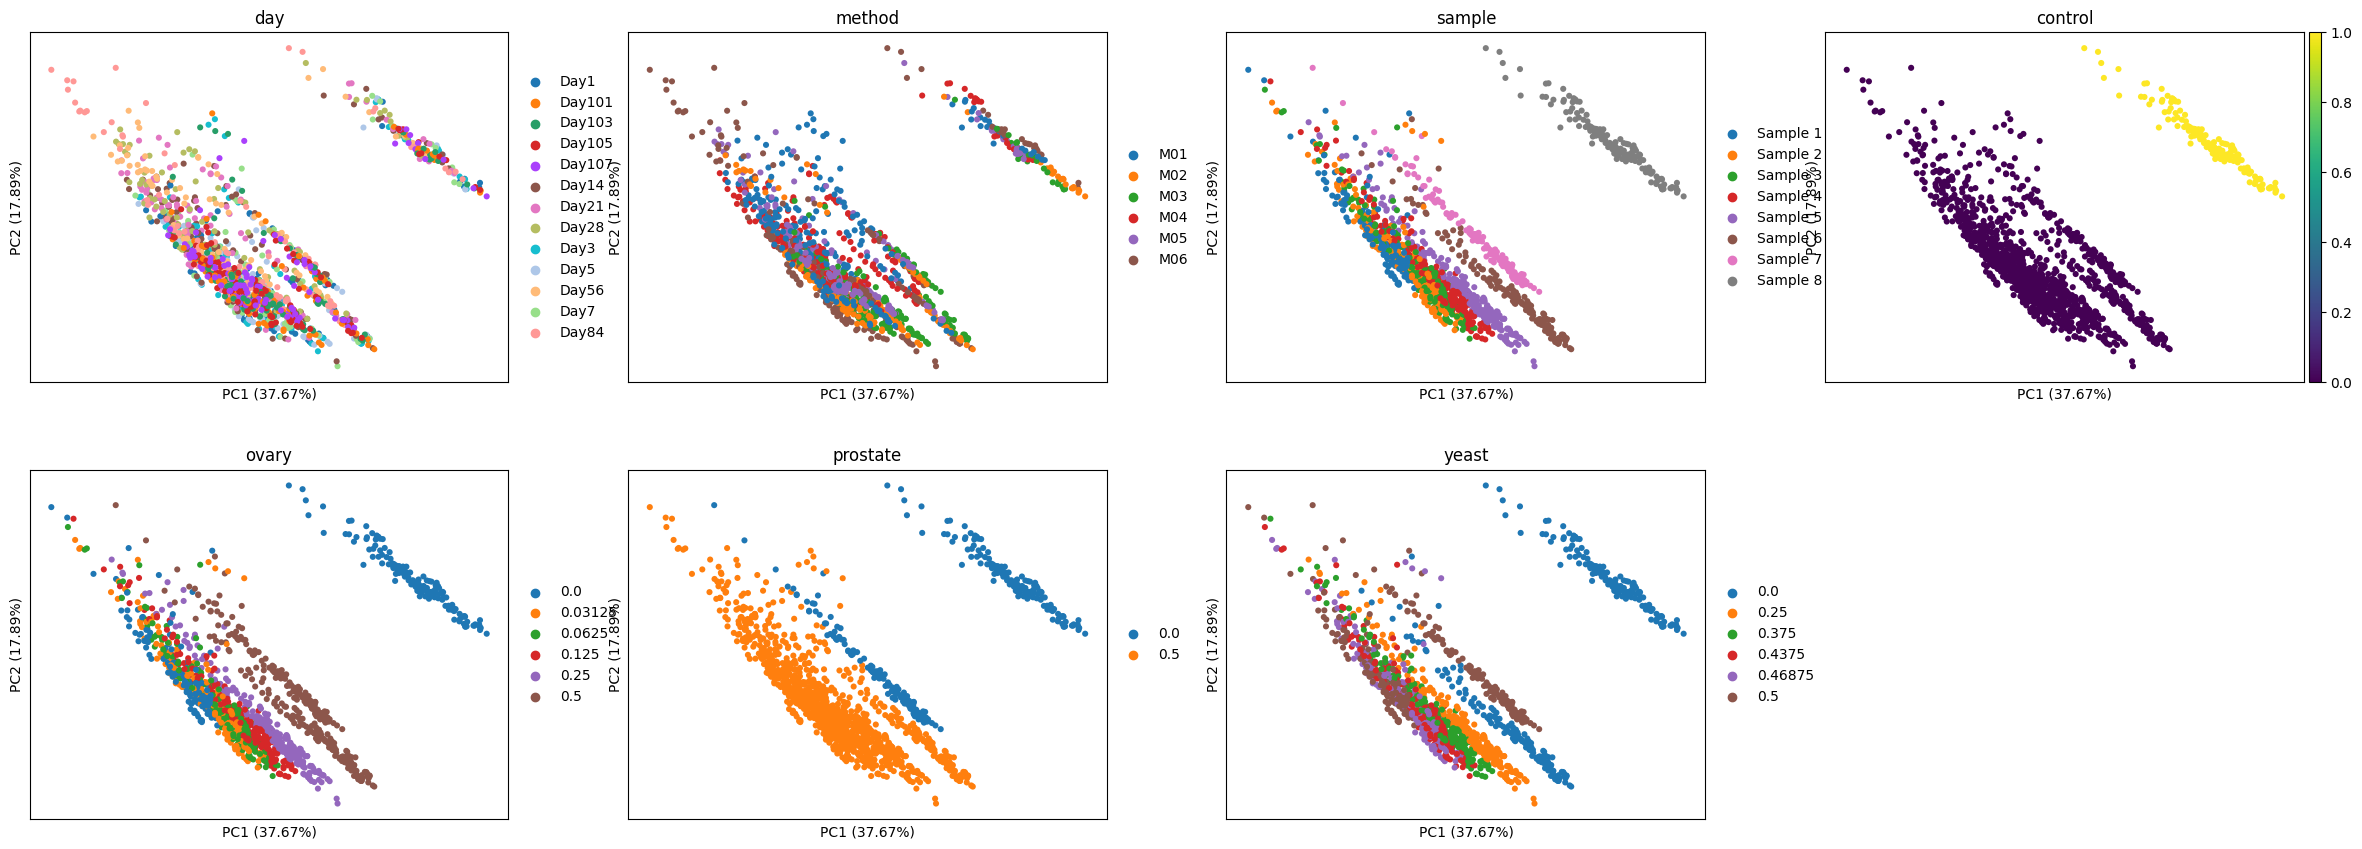

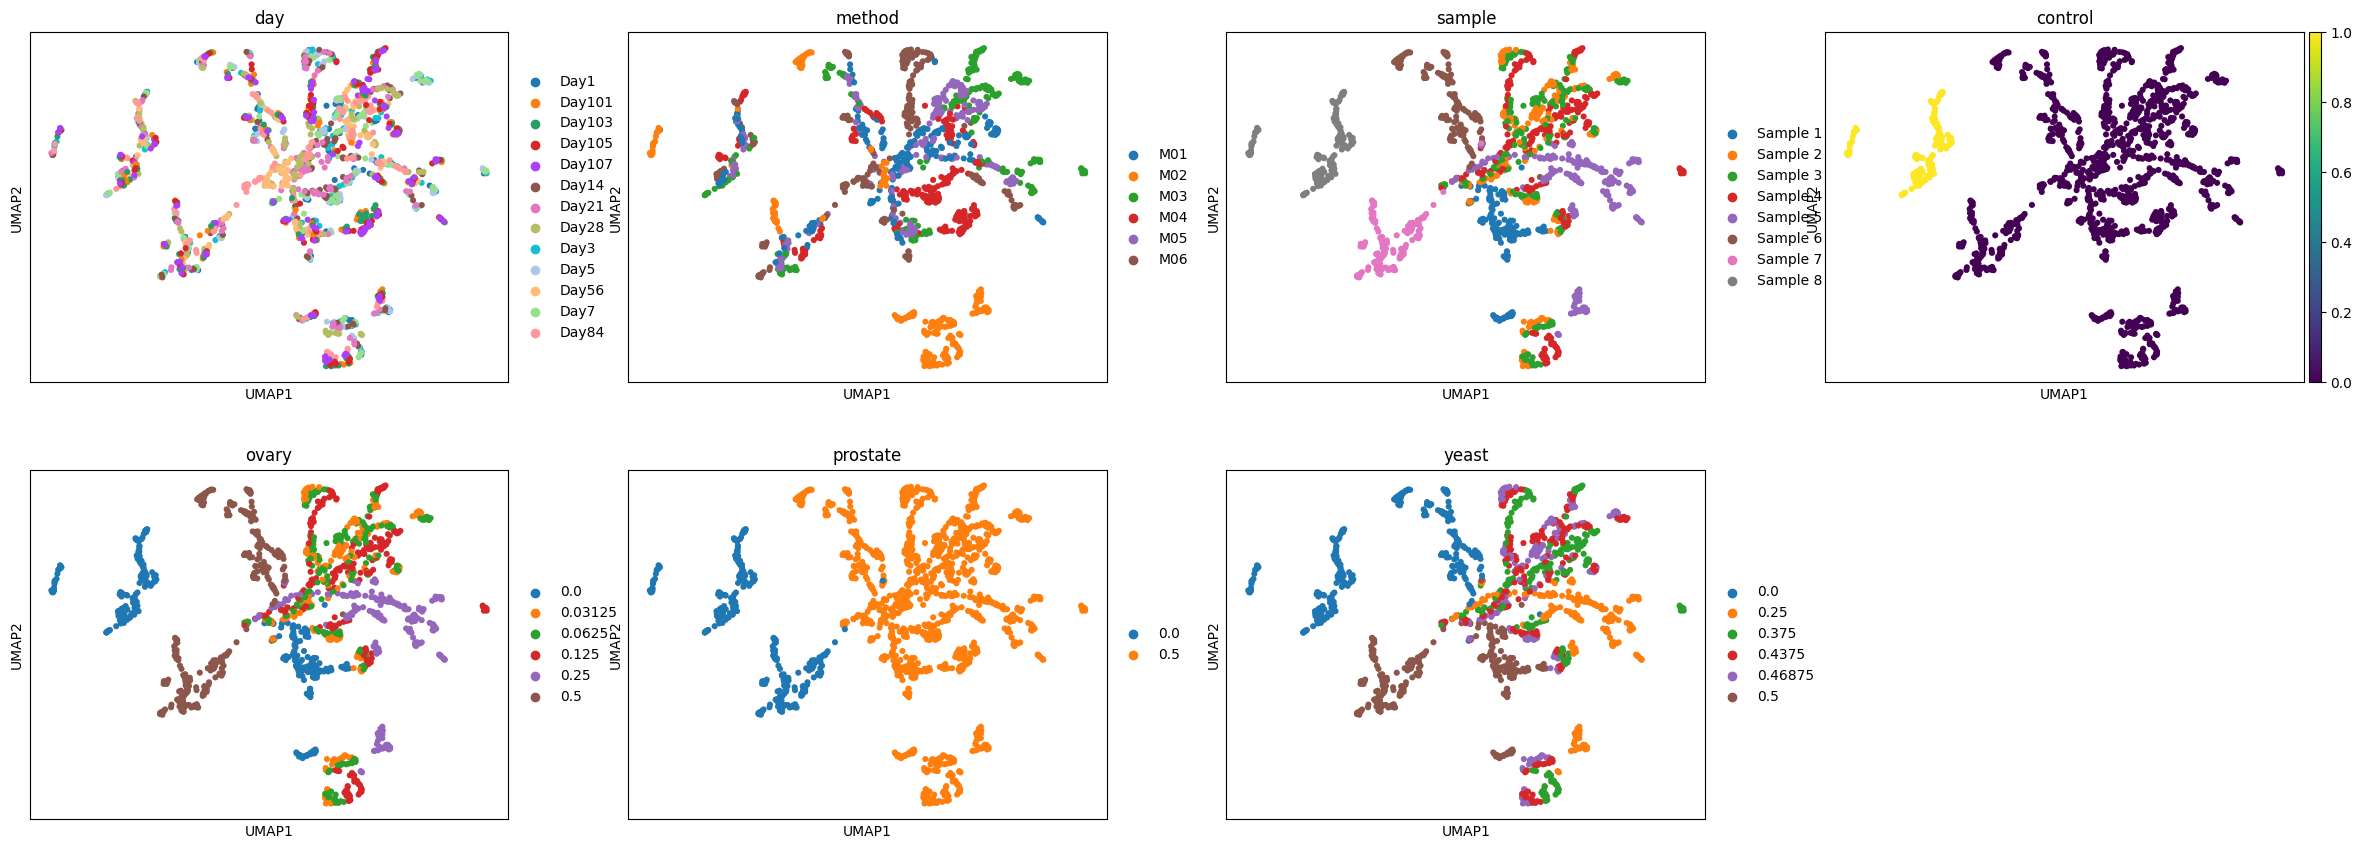

In [7]:
adata.X = bm.impute_downshifted_normal_sample(adata, layer="raw")

sc.tl.pca(adata, n_comps=16)


sc.pl.pca(
    adata,
    annotate_var_explained=True,
    color=["day", "method", "sample", "control", "ovary", "prostate", "yeast"],
    components=["1,2"],
)

sc.pp.neighbors(adata, n_neighbors=10, n_pcs=16)
sc.tl.umap(adata)
sc.pl.umap(
    adata,
    color=["day", "method", "sample", "control", "ovary", "prostate", "yeast"],
)

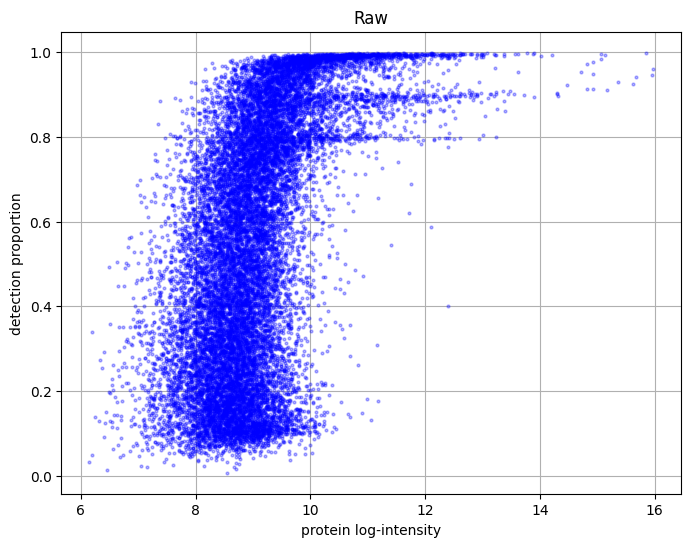

In [8]:
pl.scatter_protein_detection_proportion_and_intensity(adata.layers["raw"], title="Raw")

/home/rasmus/sollertis/school/s11/thesis/MS_mv_modelling/scp/plots.py:86: RuntimeWarning: Mean of empty slice
  x_obs_protein = np.nanmean(x, axis=0)


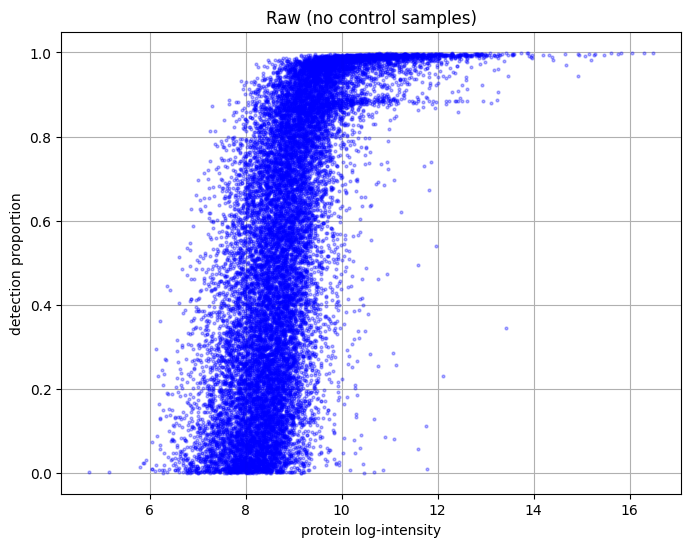

In [9]:
pl.scatter_protein_detection_proportion_and_intensity(adata.layers["raw"][adata.obs["control"] == 0,], title="Raw (no control samples)")